In [6]:
import pandas as pd
import matplotlib.pyplot as plt #importing relevant packages

In [7]:
data = pd.read_csv('/Users/as/Downloads/TPR2020_study_1.csv') #Q2.3 Plotting
df_original = pd.DataFrame(data)
df_model = pd.DataFrame(data)
print(df_original.shape, df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PPID         7824 non-null   int64  
 1   statementID  7824 non-null   int64  
 2   prior        7824 non-null   float64
 3   signal       7824 non-null   float64
 4   posterior    7824 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 305.8 KB
(7824, 5) None


In [8]:
signal_value = 2/3 #specific s value for the plot
df_plot = df_original[df_original['signal'] == signal_value].copy() #filtering for s value
print(df_plot.shape)
print(df_plot.head()) #see data & duplicates
df_plot = df_plot.drop_duplicates(subset=['prior', 'posterior']) #data cleaning
print(df_plot.shape)
df_plot.to_excel('/Users/as/Downloads/unique_data.xlsx', index=False) #check if unique data combination properly selected
print(df_plot.head())

(3933, 5)
    PPID  statementID  prior    signal  posterior
0      1            1   0.09  0.666667      0.880
1      1            2   0.74  0.666667      0.910
3      1            4   0.93  0.666667      0.995
8      1            9   0.93  0.666667      0.995
10     1           11   0.40  0.666667      0.920
(2372, 5)
    PPID  statementID  prior    signal  posterior
0      1            1   0.09  0.666667      0.880
1      1            2   0.74  0.666667      0.910
3      1            4   0.93  0.666667      0.995
10     1           11   0.40  0.666667      0.920
11     1           12   0.88  0.666667      0.610


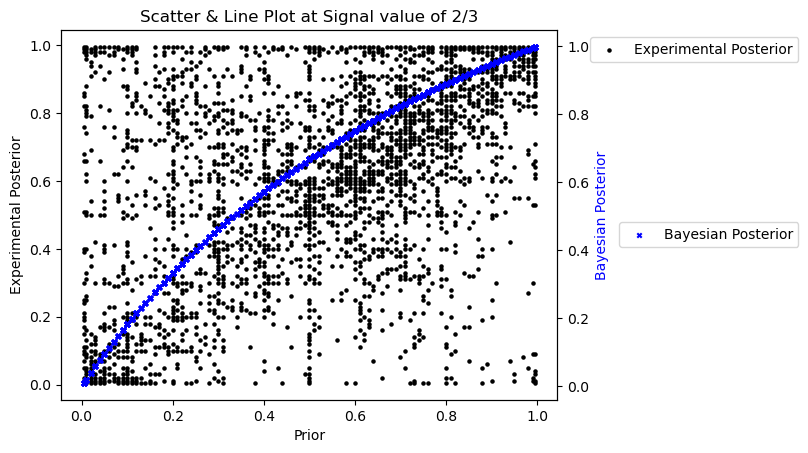

In [9]:
fig, ax1 = plt.subplots()
x_values = df_plot['prior']  # assigning x & y axis for 1st plot
y_values = df_plot['posterior']
experimental_scatter = ax1.scatter(x_values, y_values, color='black', s = 5, label = 'Experimental Posterior') #scatter plot
ax1.set_xlabel('Prior') # adding labels & title
ax1.set_ylabel('Experimental Posterior')
ax1.set_title('Scatter & Line Plot at Signal value of 2/3')
ax1.legend(loc = 'upper right', bbox_to_anchor = (1.5,1))

df_plot['bayesian_posterior'] = (df_plot['prior']*signal_value)/((df_plot['prior']*signal_value) + (1-df_plot['prior'])*(1-signal_value))
#calculating bayesian posterior using equation 1
#print(df_plot ['bayesian_posterior']) to see values different from experimental posterior

ax2 = ax1.twinx()
bayesian_scatter = ax2.scatter(df_plot['prior'],df_plot['bayesian_posterior'], color='blue', marker='x', s = 10,label='Bayesian Posterior')
ax2.set_ylabel('Bayesian Posterior', color = 'blue')
ax2.legend(loc = 'upper right',bbox_to_anchor = (1.5,0.5))
plt.savefig('Q2.3_plot.pdf', bbox_inches='tight')
plt.show()


In [10]:
import math as math         #For Q2.4
from sklearn.linear_model import LinearRegression
import statsmodels.api as stat
print(df_model.info)

df_model = df_model.drop_duplicates(subset=['prior','posterior']) #data cleaning
print(df_model.head(10)) 
print(df_model.info)

<bound method DataFrame.info of       PPID  statementID  prior    signal  posterior
0        1            1   0.09  0.666667      0.880
1        1            2   0.74  0.666667      0.910
2        1            3   0.94  0.333333      0.140
3        1            4   0.93  0.666667      0.995
4        1            5   0.88  0.333333      0.120
...    ...          ...    ...       ...        ...
7819   492           12   0.68  0.666667      0.340
7820   492           13   0.19  0.333333      0.250
7821   492           14   0.15  0.666667      0.180
7822   492           15   0.11  0.333333      0.270
7823   492           16   0.34  0.333333      0.170

[7824 rows x 5 columns]>
    PPID  statementID  prior    signal  posterior
0      1            1   0.09  0.666667      0.880
1      1            2   0.74  0.666667      0.910
2      1            3   0.94  0.333333      0.140
3      1            4   0.93  0.666667      0.995
4      1            5   0.88  0.333333      0.120
5      1          

In [12]:
import numpy as np
def bayes_rule(row):
    p = row['prior']
    s = row['signal']
    a = np.log(p/(1-p))+ np.log(s/(1-s))
    p1 = (np.exp(a))/(1+np.exp(a))
    return p1
df_model['bayesian_posterior']= df_model.apply(bayes_rule, axis = 1)
print(df_model['bayesian_posterior'])
df_model.head()

0       0.165138
1       0.850575
2       0.886792
3       0.963731
4       0.785714
          ...   
7816    0.600000
7818    0.242236
7819    0.809524
7820    0.104972
7821    0.260870
Name: bayesian_posterior, Length: 3985, dtype: float64


,PPID,statementID,prior,signal,posterior,bayesian_posterior
0,1,1,0.09,0.666667,0.880,0.165138
1,1,2,0.74,0.666667,0.910,0.850575
2,1,3,0.94,0.333333,0.140,0.886792
3,1,4,0.93,0.666667,0.995,0.963731
4,1,5,0.88,0.333333,0.120,0.785714


In [13]:
x = df_model['prior'].values.reshape(-1,1) #Trial of regression model 1
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)
print('coefficient-', model.coef_)

interecept -  0.034135030878471306
coefficient- [0.93006098]


In [14]:
x = df_model['prior'].values
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:39:35   Log-Likelihood:                 2556.8
No. Observations:                3985   AIC:                            -5110.
Df Residuals:                    3983   BIC:                            -5097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0341      0.004      7.843      0.0

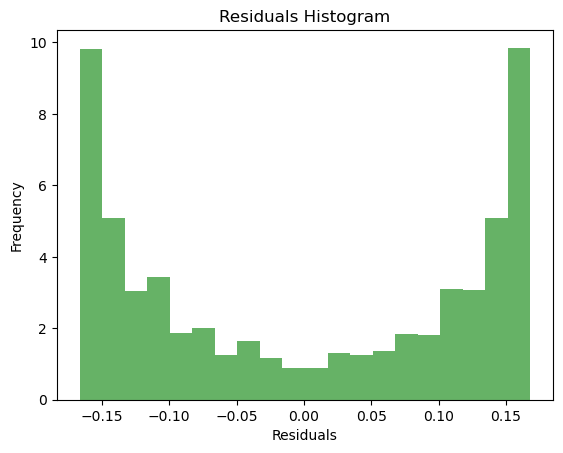

In [15]:
residuals = model.resid  # to check fit of model with more parameters since p is very small
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='g')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [21]:
x = df_model[['prior', 'signal']].values #Trial of regression model 2
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)
print('coefficient-', model.coef_)
x = df_model[['prior','signal']].values
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

interecept -  -0.34026599995104145
coefficient- [0.96986136 0.71028555]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 6.782e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:43:14   Log-Likelihood:                 6418.5
No. Observations:                3985   AIC:                        -1.283e+04
Df Residuals:                    3982   BIC:                        -1.281e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

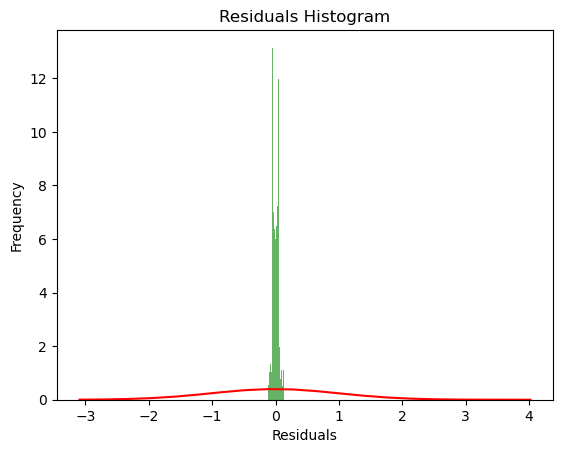

In [22]:
residuals2=model.resid # checking model 2
plt.hist(residuals2, bins=20, density=True, alpha=0.6, color='g')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

from scipy.stats import norm

data = np.random.normal(0, 1, 1000) # comparing with normal distribution 
x_range = np.linspace(np.float64(min(data)), np.float64(max(data)),20)
normal_curve = norm.pdf(x_range, np.mean(data), np.std(data))
plt.plot(x_range, normal_curve, color='red', label='Normal Distribution')
plt.show()

Appendix (Following cells present additional relationships tried out and OLS summary for comparison)

In [16]:
df_model['prior_sqrt'] = np.sqrt(df_model['prior']) #Sqaure root tranformation for trial of model #3
print(df_model[['prior', 'prior_sqrt']])

      prior  prior_sqrt
0    0.0900      0.3000
1    0.7400      0.8602
2    0.9400      0.9695
3    0.9300      0.9644
4    0.8800      0.9381
...     ...         ...
7816 0.7500      0.8660
7818 0.3900      0.6245
7819 0.6800      0.8246
7820 0.1900      0.4359
7821 0.1500      0.3873

[3985 rows x 2 columns]


In [17]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 0 to 7821
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PPID                3985 non-null   int64  
 1   statementID         3985 non-null   int64  
 2   prior               3985 non-null   float64
 3   signal              3985 non-null   float64
 4   posterior           3985 non-null   float64
 5   bayesian_posterior  3985 non-null   float64
 6   prior_sqrt          3985 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 249.1 KB


In [23]:
x = df_model['prior_sqrt'].values.reshape(-1,1)
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)
print('coefficient-', model.coef_)

interecept -  -0.2523252935580218
coefficient- [1.12455341]


In [19]:
x = df_model['prior_sqrt'].values   #trial model 3
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.369e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:41:39   Log-Likelihood:                 2299.3
No. Observations:                3985   AIC:                            -4595.
Df Residuals:                    3983   BIC:                            -4582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2523      0.007    -36.179      0.0

In [26]:
from sklearn.preprocessing import PolynomialFeatures


degree = 2  
poly = PolynomialFeatures(degree=degree)     #trial model 4

x = df_model['prior'].values.reshape(-1, 1)

x_poly = poly.fit_transform(x) #tranforming variable x

for i in range(1, x_poly.shape[1]):
    df_model[f'prior_poly_{i}'] = x_poly[:, i]

df_model.info()
df_model.drop(columns=['prior_poly_1'], inplace=True)
df_model.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 0 to 7821
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PPID                3985 non-null   int64  
 1   statementID         3985 non-null   int64  
 2   prior               3985 non-null   float64
 3   signal              3985 non-null   float64
 4   posterior           3985 non-null   float64
 5   bayesian_posterior  3985 non-null   float64
 6   prior_sqrt          3985 non-null   float64
 7   prior_poly_1        3985 non-null   float64
 8   prior_poly_2        3985 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 311.3 KB


,PPID,statementID,prior,signal,posterior,bayesian_posterior,prior_sqrt,prior_poly_2
0,1,1,0.0900,0.6667,0.8800,0.1651,0.3000,0.0081
1,1,2,0.7400,0.6667,0.9100,0.8506,0.8602,0.5476
2,1,3,0.9400,0.3333,0.1400,0.8868,0.9695,0.8836
3,1,4,0.9300,0.6667,0.9950,0.9637,0.9644,0.8649
4,1,5,0.8800,0.3333,0.1200,0.7857,0.9381,0.7744


In [27]:
x = df_model['prior_poly_2'].values.reshape(-1,1)
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)     #trial model 4
print('coefficient-', model.coef_)
x = df_model['prior_poly_2'].values
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

interecept -  0.2180966728044515
coefficient- [0.86570286]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:48:33   Log-Likelihood:                 2091.2
No. Observations:                3985   AIC:                            -4178.
Df Residuals:                    3983   BIC:                            -4166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [28]:
x = df_model[['prior_sqrt', 'signal']].values #trial model 5
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)
print('coefficient-', model.coef_)
x = df_model[['prior_sqrt','signal']].values
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

interecept -  -0.6343333882340835
coefficient- [1.17138786 0.70272542]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 3.156e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:50:02   Log-Likelihood:                 4958.6
No. Observations:                3985   AIC:                            -9911.
Df Residuals:                    3982   BIC:                            -9892.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [33]:
df_model['prior_log'] = np.log(df_model['prior']) #trial model 5 using log tranformation
print(df_model[['prior', 'prior_log']])

      prior  prior_log
0    0.0900    -2.4079
1    0.7400    -0.3011
2    0.9400    -0.0619
3    0.9300    -0.0726
4    0.8800    -0.1278
...     ...        ...
7816 0.7500    -0.2877
7818 0.3900    -0.9416
7819 0.6800    -0.3857
7820 0.1900    -1.6607
7821 0.1500    -1.8971

[3985 rows x 2 columns]


In [34]:
x = df_model[['prior_log']].values.reshape(-1,1) #trial model 5
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)
print('coefficient-', model.coef_)
x = df_model[['prior_log']].values
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

interecept -  0.7395497507181786
coefficient- [0.23755146]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     6435.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:52:22   Log-Likelihood:                 1246.8
No. Observations:                3985   AIC:                            -2490.
Df Residuals:                    3983   BIC:                            -2477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [160]:
from scipy import stats

df_model['prior_transformed'], lambda_value = stats.boxcox(df_model['prior']) #trial model 6
print("Lambda value:", lambda_value) 

Lambda value: 0.7675202648289912


In [162]:
x = df_model[['prior_transformed', 'signal']].values #trial model 6
y = df_model['bayesian_posterior']
model = LinearRegression()

model.fit(x,y)
print('interecept - ', model.intercept_)
print('coefficient-', model.coef_)
x = df_model[['prior_transformed','signal']].values
x = stat.add_constant(x)
y = df_model['bayesian_posterior'].values
model = stat.OLS(y,x).fit()
pd.set_option('display.float_format', '{:.4f}'.format)

print(model.summary())

interecept -  0.6117248483672628
coefficient- [0.76358526 0.64826121]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.007e+05
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:28:37   Log-Likelihood:                 10802.
No. Observations:                7824   AIC:                        -2.160e+04
Df Residuals:                    7821   BIC:                        -2.158e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------